[View in Colaboratory](https://colab.research.google.com/github/amit6604/TensofFlow-programs/blob/master/Linear_Regression.ipynb)

# Introduction

Linear regression is probably the first machine learning algorithm that most people learn when starting off in this field. Learning this model is a great way to get introduced to the idea of supervised learning.

We have some (input, output) pairs which we denote as (xi,yi)
and we have n of these, so i∈[1...n]. We want to learn a function f:x→y that maps inputs to outputs. 

In [0]:
# Importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from numpy import genfromtxt
from sklearn.datasets import load_boston
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

# Inputs and Outputs

Our goal is to learn a function $ f: x \rightarrow{} y$ that maps information about a house to the house's price prediction. With linear regression, our function $f$ is just a ** linear combination ** of our inputs. That means our output is just the sum of our inputs, but each of our inputs are weighted by some value: 

$$f(x) = w_1 x_1 + w_2 x_2 + ... w_{13}x_{13} + b = \sum_{j=1}^{13} w_j x_j + b$$

In [40]:
features, labels = load_boston(True)
features = normalize(features) # to standardize data

labels = labels.reshape((labels.shape[0], 1)) 

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=23)
print(features.shape)

(506, 13)


In [0]:
learning_rate = 0.5
training_epochs = 5000
n_dim = features.shape[1]

X = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([n_dim, 1]))
b = tf.Variable(tf.random_normal([1]))

init = tf.global_variables_initializer()

# Loss Functions and Optimizations
Next, we will initialize this linear model with initially random weights. As a result, our model won't be able to predict house prices very well at all. Learning is the process of adjusting these parameters so that our model's accuracy increases. In order to do this, we need to mathematically quantify how "bad" our model is currently. We can do this by calculating how off each prediction is from the actual value: 

$$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i))^2 $$

If we take the derivative of this function with respect to each of the weights $w$, we will know how much to "adjust" each weight $w$ by in order to make our function more accurate. This is an algorithm called ** gradient descent **. 

If you know some multivariable calculus, you can determine that the derivative with respect to the $i$th weight is $$ \frac{dL}{dw_i} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - f(x_i))x_i $$

In [0]:
y_pred = tf.matmul(X,W) + b
loss = tf.reduce_mean(tf.square(y_pred - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Training

In [45]:
sess = tf.InteractiveSession()
sess.run(init)


for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X:X_train, y:y_train})
    if (epoch % 100 ==0):
      print('Loss:', loss.eval(feed_dict={X: X_train,y: y_train}))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Loss: 445.49432
Loss: 60.92518
Loss: 59.14323
Loss: 57.920425
Loss: 57.0175
Loss: 56.30254
Loss: 55.701805
Loss: 55.173428
Loss: 54.693077
Loss: 54.246292
Loss: 53.824184
Loss: 53.4211
Loss: 53.033333
Loss: 52.65833
Loss: 52.294304
Loss: 51.939964
Loss: 51.594322
Loss: 51.256653
Loss: 50.92636
Loss: 50.60299
Loss: 50.286167
Loss: 49.97559
Loss: 49.670986
Loss: 49.372147
Loss: 49.07888
Loss: 48.791016
Loss: 48.508408
Loss: 48.23092
Loss: 47.958427
Loss: 47.69081
Loss: 47.42797
Loss: 47.169796
Loss: 46.916203
Loss: 46.667088
Loss: 46.422363
Loss: 46.181953
Loss: 45.945766
Loss: 45.713722
Loss: 45.485744
Loss: 45.261757
Loss: 45.041683
Loss: 44.825462
Loss: 44.61301
Loss: 44.40426
Loss: 44.199142
Loss: 43.997593
Loss: 43.799553
Loss: 43.604946
Loss: 43.413715
Loss: 43.225807


# Data Visualization

MSE: 48.0630


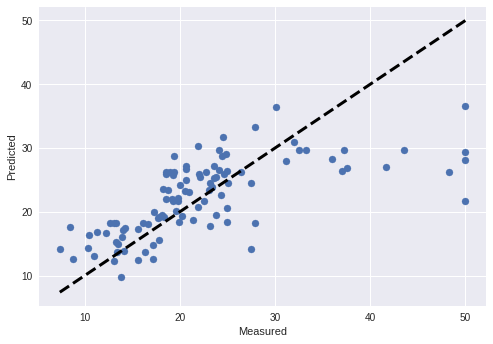

In [47]:
pred_y = sess.run(y_pred, feed_dict={X: X_test})
mse = tf.reduce_mean(tf.square(pred_y - y_test))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(y_test, pred_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()